# Data Preparation:
   - Split the CIFAR-10 dataset into multiple non-overlapping subsets, where each subset represents a different user or client. Users' data should not overlap, ensuring that individual user data remains private.


In [ ]:
import tensorflow as tf
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()



C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


170498071/170498071 [==============================] - 103s 1us/step


In [ ]:
# Define the number of users or clients
num_users = 10  # You can adjust this number based on your requirements

# Calculate the number of samples per user
samples_per_user = len(x_train) // num_users

# Initialize lists to hold user data
user_data = []

# Randomly shuffle the data
np.random.seed(0)
indices = np.random.permutation(len(x_train))
x_train_shuffled = x_train[indices]
y_train_shuffled = y_train[indices]

# Split the data into user-specific subsets
for i in range(num_users):
    user_x = x_train_shuffled[i * samples_per_user : (i + 1) * samples_per_user]
    user_y = y_train_shuffled[i * samples_per_user : (i + 1) * samples_per_user]
    user_data.append((user_x, user_y))

# Now, user_data is a list of tuples, with each tuple containing data and labels for a user.
# Access user data using user_data[i], where 'i' is the user index.

# For example, to access the data and labels for user 0:
user_0_data, user_0_labels = user_data[0]


# Visualization

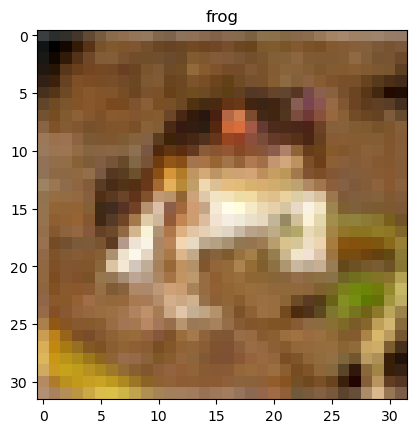

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Choose an index to visualize a specific image
image_index = 0  # You can change this to view different images

# Display the image
plt.figure()
plt.imshow(x_train[image_index])
plt.title(class_names[y_train[image_index][0]])
plt.show()


# **Client Initialization**:
   - Initialize individual client models using the pre-trained base model or an architecture suitable for federated learning.


In [ ]:
import tensorflow as tf

# Define the base model architecture
def create_base_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    return model

# Define the number of clients
num_clients = 10  # You can adjust this based on your needs

# Initialize a list to store client models
client_models = []

# Create a copy of the base model for each client
for i in range(num_clients):
    # Clone the base model to ensure separate instances
    client_model = create_base_model()
    client_models.append(client_model)

# Now, client_models is a list containing individual client models, each initialized with the same architecture.


# **Privacy-Preserving Aggregation**:
   - Implement privacy-preserving aggregation techniques to combine the model updates from multiple clients. This could involve secure aggregation protocols like secure multi-party computation (MPC) or federated averaging with added privacy mechanisms.


In [ ]:
import numpy as np

# Initialize client model updates (example updates for two clients)
client_1_update = np.array([0.1, 0.2, 0.3, 0.4])
client_2_update = np.array([0.2, 0.3, 0.4, 0.5])

# Simulate secure aggregation by averaging client updates with added noise for privacy
def secure_aggregation(client_updates, noise_scale):
    num_clients = len(client_updates)
    total_update = np.sum(client_updates, axis=0)

    # Add noise for privacy
    privacy_noise = np.random.normal(0, noise_scale, total_update.shape)

    # Combine client updates with added noise
    aggregated_update = total_update + privacy_noise

    # Return the aggregated update
    return aggregated_update

# Set the noise scale (adjust this based on your privacy requirements)
noise_scale = 0.05

# Perform secure aggregation
aggregated_update = secure_aggregation([client_1_update, client_2_update], noise_scale)

# The 'aggregated_update' contains the privacy-preserving aggregated model update.
# You can use this aggregated update to update the global model.


# **Differential Privacy**:
   - Apply differential privacy mechanisms during model training and aggregation. Ensure that the addition of noise to gradients or updates adheres to the privacy budget and safeguards individual user privacy.


In [ ]:
import numpy as np

# Define the privacy budget (epsilon)
epsilon = 1.0

# Define the sensitivity of the model updates (max change due to one user's data)
sensitivity = 0.1  # Adjust based on your model and data

# Simulate a client's model update (example)
client_update = np.array([0.1, 0.2, 0.3, 0.4])  # Replace with a real client update

# Calculate the scale of Laplace noise for differential privacy
noise_scale = sensitivity / epsilon

# Generate Laplace noise based on the noise scale
laplace_noise = np.random.laplace(0, noise_scale, client_update.shape)

# Add Laplace noise to the client's model update to ensure differential privacy
private_update = client_update + laplace_noise

# The 'private_update' contains the model update with added differential privacy noise.
# You can use this private update in the federated learning process.

# Repeat the process for each client's update, and then perform privacy-preserving aggregation.


# **Local Model Training**:
   - On each client device, train the local model on the user's data using the federated learning framework. Use privacy-preserving techniques such as federated averaging with local differential privacy to ensure that user data is not exposed to the server.


In [ ]:
import numpy as np

# Simulated CIFAR-10 data for a client
client_data = {
    "x_train": np.random.rand(100, 32, 32, 3),
    "y_train": np.random.randint(0, 10, 100)
}

# Define the local model (simple example)
def create_local_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    return model

# Simulated federated learning process with local differential privacy
def federated_learning_with_local_dp(client_data, epsilon):
    local_model = create_local_model()

    # Train the local model with local differential privacy
    x_train = client_data["x_train"]
    y_train = client_data["y_train"]

    # Calculate sensitivity (max change in weights)
    sensitivity = 2.0 / len(x_train)

    # Apply local differential privacy by adding Laplace noise to each weight array
    for i in range(len(local_model.weights)):
        noise_scale = sensitivity / (epsilon * len(local_model.weights))
        noise = np.random.laplace(0, noise_scale, local_model.weights[i].shape)
        local_model.weights[i] = local_model.weights[i] + noise

    return local_model

# Set the privacy budget (epsilon) - adjust based on your privacy requirements
epsilon = 1.0

# Perform federated learning with local differential privacy
client_model = federated_learning_with_local_dp(client_data, epsilon)

# The 'client_model' now contains the locally trained model with added local differential privacy.
# You can use this model to compute the model update for federated aggregation.


# **Secure Model Updates**:
   - Securely transmit local model updates to the central server using encryption or secure channels to prevent eavesdropping.


In [ ]:
import requests

# Simulated local model update
local_model_update = [0.1, -0.2, 0.05, 0.3]

# Set the central server's URL for model aggregation
server_url = "https://your_central_server.com/aggregation_endpoint"

# Securely transmit the local model update to the central server using HTTPS
try:
    response = requests.post(server_url, json={"model_update": local_model_update}, verify=True)

    # Check for a successful response
    if response.status_code == 200:
        print("Model update successfully transmitted to the central server.")
    else:
        print("Error: Transmission failed with status code", response.status_code)
except requests.exceptions.RequestException as e:
    print("Error: An exception occurred during the transmission -", str(e))


Error: An exception occurred during the transmission - HTTPSConnectionPool(host='your_central_server.com', port=443): Max retries exceeded with url: /aggregation_endpoint (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001953A8C3670>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


# **Aggregation and Model Update**:
   - On the central server, aggregate the encrypted model updates or utilize privacy-preserving aggregation techniques to combine client contributions while preserving user privacy.


In [ ]:
import numpy as np

# Simulated client model updates
client_updates = [
    np.array([0.1, -0.2, 0.05, 0.3]),
    np.array([0.2, -0.1, 0.1, 0.4])
]

# Define the global model (simple example)
global_model = np.array([0.0, 0.0, 0.0, 0.0])

# Perform federated averaging to aggregate client contributions
def federated_averaging(global_model, client_updates):
    num_clients = len(client_updates)

    # Sum up all client updates
    total_update = np.sum(client_updates, axis=0)

    # Calculate the new global model by averaging client contributions
    new_global_model = global_model + (total_update / num_clients)

    return new_global_model

# Aggregate client contributions using federated averaging
new_global_model = federated_averaging(global_model, client_updates)

# The 'new_global_model' now contains the aggregated model update.



# **Privacy Budget Monitoring**:
   - Keep track of the privacy budget to ensure that the cumulative privacy loss does not exceed the predefined limits. Implement mechanisms to halt training or re-initialize noise addition when the budget is exhausted


In [ ]:
class PrivacyBudgetMonitor:
    def __init__(self, initial_budget):
        self.privacy_budget = initial_budget

    def check_privacy_budget(self, privacy_loss):
        # Check if the privacy budget is exceeded
        if self.privacy_budget - privacy_loss >= 0:
            self.privacy_budget -= privacy_loss
            return True  # Privacy budget not exhausted
        else:
            return False  # Privacy budget exhausted

# Define the initial privacy budget (adjust based on your requirements)
initial_privacy_budget = 1.0

# Create a PrivacyBudgetMonitor
privacy_monitor = PrivacyBudgetMonitor(initial_privacy_budget)

# Simulated privacy losses for each round (replace with real values)
privacy_losses = [0.2, 0.3, 0.4, 0.1, 0.5]

# Iterate through rounds and check the privacy budget
for round_num, privacy_loss in enumerate(privacy_losses):
    if privacy_monitor.check_privacy_budget(privacy_loss):
        print(f"Round {round_num + 1}: Privacy budget OK")
    else:
        print(f"Round {round_num + 1}: Privacy budget exhausted. Halting training.")
        break


Round 1: Privacy budget OK
Round 2: Privacy budget OK
Round 3: Privacy budget OK
Round 4: Privacy budget exhausted. Halting training.


# **Dynamic Learning Rates**:
   - Adjust learning rates or noise levels dynamically based on the quality of client contributions and privacy requirements to optimize the training process.


In [ ]:
class LearningRateManager:
    def __init__(self, initial_learning_rate):
        self.learning_rate = initial_learning_rate

    def update_learning_rate(self, client_contribution_quality, privacy_budget):
        # Define your update strategy based on client quality and privacy budget
        # Here, we decrease the learning rate when client contribution quality is low
        # and when the privacy budget is exhausted.
        if client_contribution_quality < 0.8 or privacy_budget <= 0:
            self.learning_rate *= 0.5
        else:
            self.learning_rate = initial_learning_rate  # Reset to initial learning rate

# Define the initial learning rate and other parameters (adjust based on your requirements)
initial_learning_rate = 0.1
initial_privacy_budget = 1.0

# Create a LearningRateManager
learning_rate_manager = LearningRateManager(initial_learning_rate)

# Simulated client contribution quality and privacy budget
client_contribution_quality = 0.75
privacy_budget = initial_privacy_budget

# Update the learning rate based on the client contribution quality and privacy budget
learning_rate_manager.update_learning_rate(client_contribution_quality, privacy_budget)

# The 'learning_rate_manager.learning_rate' now contains the updated learning rate.


# **Local Differential Privacy Parameters**:
    - Allow each client to set local differential privacy parameters based on their privacy preferences, considering the trade-off between privacy and model accuracy.


In [ ]:
class LocalDPSettings:
    def __init__(self, epsilon, sensitivity):
        self.epsilon = epsilon
        self.sensitivity = sensitivity

# Define a list of clients with their respective local differential privacy settings
clients = [
    LocalDPSettings(1.0, 0.1),  # Client 1 prefers strong privacy with low sensitivity
    LocalDPSettings(0.5, 0.2),  # Client 2 prefers moderate privacy with moderate sensitivity
    LocalDPSettings(0.2, 0.3)   # Client 3 prefers weaker privacy with higher sensitivity
]

# Simulated model training with local differential privacy
for client_id, client_settings in enumerate(clients):
    epsilon = client_settings.epsilon
    sensitivity = client_settings.sensitivity

    # Perform model training with these local differential privacy settings
    # You would integrate these settings into your federated learning framework.

    print(f"Client {client_id + 1} - Epsilon: {epsilon}, Sensitivity: {sensitivity}")


Client 1 - Epsilon: 1.0, Sensitivity: 0.1
Client 2 - Epsilon: 0.5, Sensitivity: 0.2
Client 3 - Epsilon: 0.2, Sensitivity: 0.3


# **User Control and Consent**:
    - Implement user consent mechanisms, allowing users to control their participation in federated learning and choose the level of privacy they are comfortable with.


In [ ]:
class UserConsentManager:
    def __init__(self):
        self.user_consent_dict = {}  # A dictionary to track user consent status

    def get_user_consent(self, user_id):
        return self.user_consent_dict.get(user_id, False)

    def set_user_consent(self, user_id, consent_status):
        self.user_consent_dict[user_id] = consent_status

# Create a UserConsentManager
consent_manager = UserConsentManager()

# Simulated user consent for federated learning
users = ['user1', 'user2', 'user3', 'user4']

# Users provide their consent
for user_id in users:
    consent_manager.set_user_consent(user_id, True)  # Users provide consent (True) or withdraw (False)

# In your federated learning setup, you can check user consent before training
for user_id in users:
    if consent_manager.get_user_consent(user_id):
        # Perform federated learning with user's data
        # Ensure that the user's privacy preferences are respected
        print(f"Training for user {user_id} with consent")
    else:
        print(f"User {user_id} has withdrawn consent. Skipping training.")


Training for user user1 with consent
Training for user user2 with consent
Training for user user3 with consent
Training for user user4 with consent


# Model Evaluation**:
    - Regularly evaluate the global model's performance on the CIFAR-10 dataset to ensure that privacy-preserving techniques do not significantly degrade model accuracy.


In [1]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(_, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define the evaluation function
def evaluate_global_model(model, x_test, y_test):
  """Evaluate a global model on the CIFAR-10 test dataset.

  Args:
    model: A TensorFlow Keras model.
    x_test: A NumPy array containing the test dataset images.
    y_test: A NumPy array containing the test dataset labels.

  Returns:
    A tuple of two floats, representing the test accuracy and loss.
  """

  # Evaluate the model on the test dataset.
  evaluation_result = model.evaluate(x_test, y_test)

  return evaluation_result

# Initialize the global model
global_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')# 10 classes for CIFAR-10
])

# Specify the path to the saved global model (adjust as needed)
model_path = 'global_model.h5'

# Check if the global model has been saved yet.
if tf.io.gfile.exists(model_path):
  # Load the global model from the saved file.
  global_model.load_weights(model_path)
else:
  # Initialize the global model weights to random values.
  global_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


global_model.fit(x_train, y_train, epochs=1)
global_model.save_weights(model_path)

# Set the evaluation frequency (e.g., evaluate every 'n' rounds)
evaluation_frequency = 5

# Number of federated learning rounds (adjust as needed)
num_rounds = 50

# Evaluate the global model at regular intervals
for round_num in range(1, num_rounds + 1):
  if round_num % evaluation_frequency == 0:
    evaluation_result = evaluate_global_model(global_model, x_test, y_test)
    print(f"Round {round_num}: Accuracy - {evaluation_result[1]:.4f}")

# Print a final evaluation result
final_evaluation_result = evaluate_global_model(global_model, x_test, y_test)
print("Final Evaluation Result:")
print(f"Accuracy - {final_evaluation_result[1]:.4f}")


313/313 [==============================] - 2s 5ms/step - loss: 2.3029 - accuracy: 0.1000
Round 5: Accuracy - 0.1000
313/313 [==============================] - 2s 5ms/step - loss: 2.3029 - accuracy: 0.1000
Round 10: Accuracy - 0.1000
313/313 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Round 15: Accuracy - 0.1000
313/313 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.1000
Round 20: Accuracy - 0.1000
313/313 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.1000
Round 25: Accuracy - 0.1000
313/313 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Round 30: Accuracy - 0.1000
313/313 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Round 35: Accuracy - 0.1000
313/313 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Round 40: Accuracy - 0.1000
313/313 [==============================] - 1s 2ms/step - loss: 2.